# Serie de Tiempo
***(Atención: Este no es un curso sobre análisis de series de tiempo. Solo veremos conceptos básicos)***    

Es un gráfico de líneas cuya variable del Eje X es temporal a una granularidad muy específica (días, horas, minutos, segundos, milisegundos) y que el número de observaciones graficadas esté en el orden de las miles. Esto es debido a que en una serie de tiempo no nos interesan puntos individuales si no tendencias, pendientes, cambios, valles y picos a lo largo del tiempo. Es decir, analizar los puntos como un conjunto. Debido a esto, el número de observaciones debe ser grande.    

Dada la cantidad de puntos, *no* se añade una clave visual como marcadores para identificar a que parte de la línea pertenece cada punto. Pueden ser acompañados por una segunda línea codificada en un segundo Eje Y. También pueden ser acompañados por una línea de tendencia o un intervalo de confianza de predicción.        

**Eje X**: Variable temporal de alta granularidad   
**Eje Y**: Variable numérica     

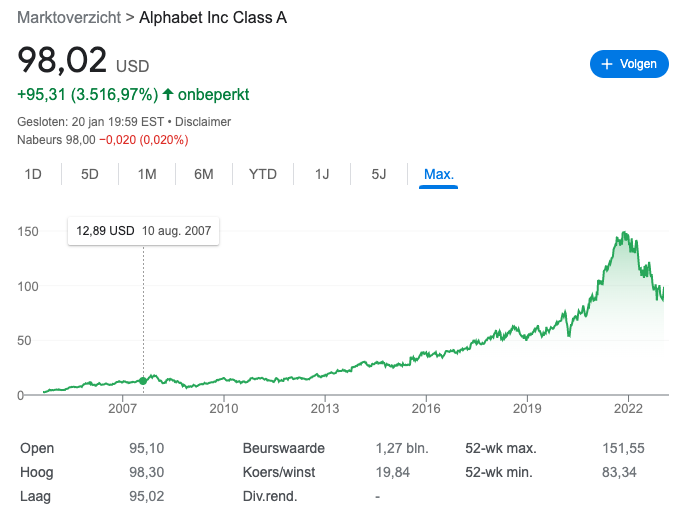

**Ejemplos de Uso**:
- Analizar como ha cambiado el valor de la acción de una empresa a través del tiempo

### Cuando utilizar
- Quiero analizar comportamientos a través del tiempo:
  - Seasonality: Se denomina "Seasonality" (estacionalidad en español) cuando una serie de tiempo presenta características similares en periodos equivalentes de tiempo (mismo dia en diferentes años, mismo mes en diferentes años, mismo dia de la semana, etc). Tambien denominada patrón.
  - Tendencias: Se denomina "Tendencia" cuando observamos como a través del tiempo el valor numérico tiende a subir o a bajar en promedio
  - Perturbaciones: Lugares en la curva donde ha ocurrido un valle o un pico que no sigue la tendencia o la estacionalidad. Son motivo de investigación.
    - Valles: Perturbación donde la curva disminuye de golpe pero luego de un determinado tiempo vuelve a subir.
    - Picos: Perturbación donde la curva aumenta de golpe pero luego de un determinado tiempo vuelve a bajar
  
  
### Tendencia
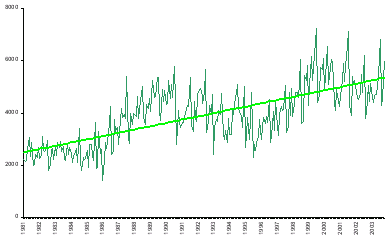



### Cuando no utilizar
- Si no tengo mediciones temporales de baja granularidad
- Si quiero analizar puntos individuales y no las tendencias, estacionalidades o perturbaciones

### Consejos
- No es necesario que el eje Y empiece en el valor del "cero" (a diferencia de los graficos de barras o de líneas comunes). Ya que no analizamos valores individuales en la curva.
- No interpolar o suavizar la curva.
- Si vamos a hacer múltiples series de tiempo en el mismo gráfico: 
  - Procurar que no existan muchas lineas.
  - Procurar que las variables que cada linea representan sean diferenciables (por ejemplo, a traves de colores diferentes)
  - Procurar que ambas series de tiempo tengan rangos de valores numéricos comparables. De otro modo, una línea quedará ilegible como una recta
- Si mi numero de observaciones se encuentra en el orden de las decenas (<50), es complicado analizar una gráfica de línea como serie de tiempo.

Las series de tiempo son un tópico que merece un curso entero para ser analizadas en detalle! 


## En esta clase
### Datos
1. Información sobre ventas de un supermercado
2. Información sobre mensajes publicados en Twitter dirigidos a marcas de retail (experiencias del consumidor)   

### Objetivos
1. Cómo ha cambiado la venta de mis productos por día a lo largo de todas las tiendas?
2. Existe alguna estacionalidad en los dias que las personas publican Tweets hacia marcas de retail?

## Referencias
- https://chartio.com/learn/charts/line-chart-complete-guide/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/tienda_ventas.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,1,2013-01-01,1,BABY CARE,0.00000,0
2,2,2013-01-01,1,BEAUTY,0.00000,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0
4,4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0


In [3]:
# Ventas por mes en todas las tiendas tomando en cuenta todos los productos
por_dia = df[['date', 'sales']].groupby('date').sum()
por_dia

,sales
date,
2013-01-01,2.511619e+03
2013-01-02,4.960924e+05
2013-01-03,3.614612e+05
2013-01-04,3.544597e+05
2013-01-05,4.773501e+05
...,...
2016-04-26,7.047994e+05
2016-04-27,6.702881e+05
2016-04-28,5.433398e+05


Text(0.5, 1.0, 'Ventas por día')

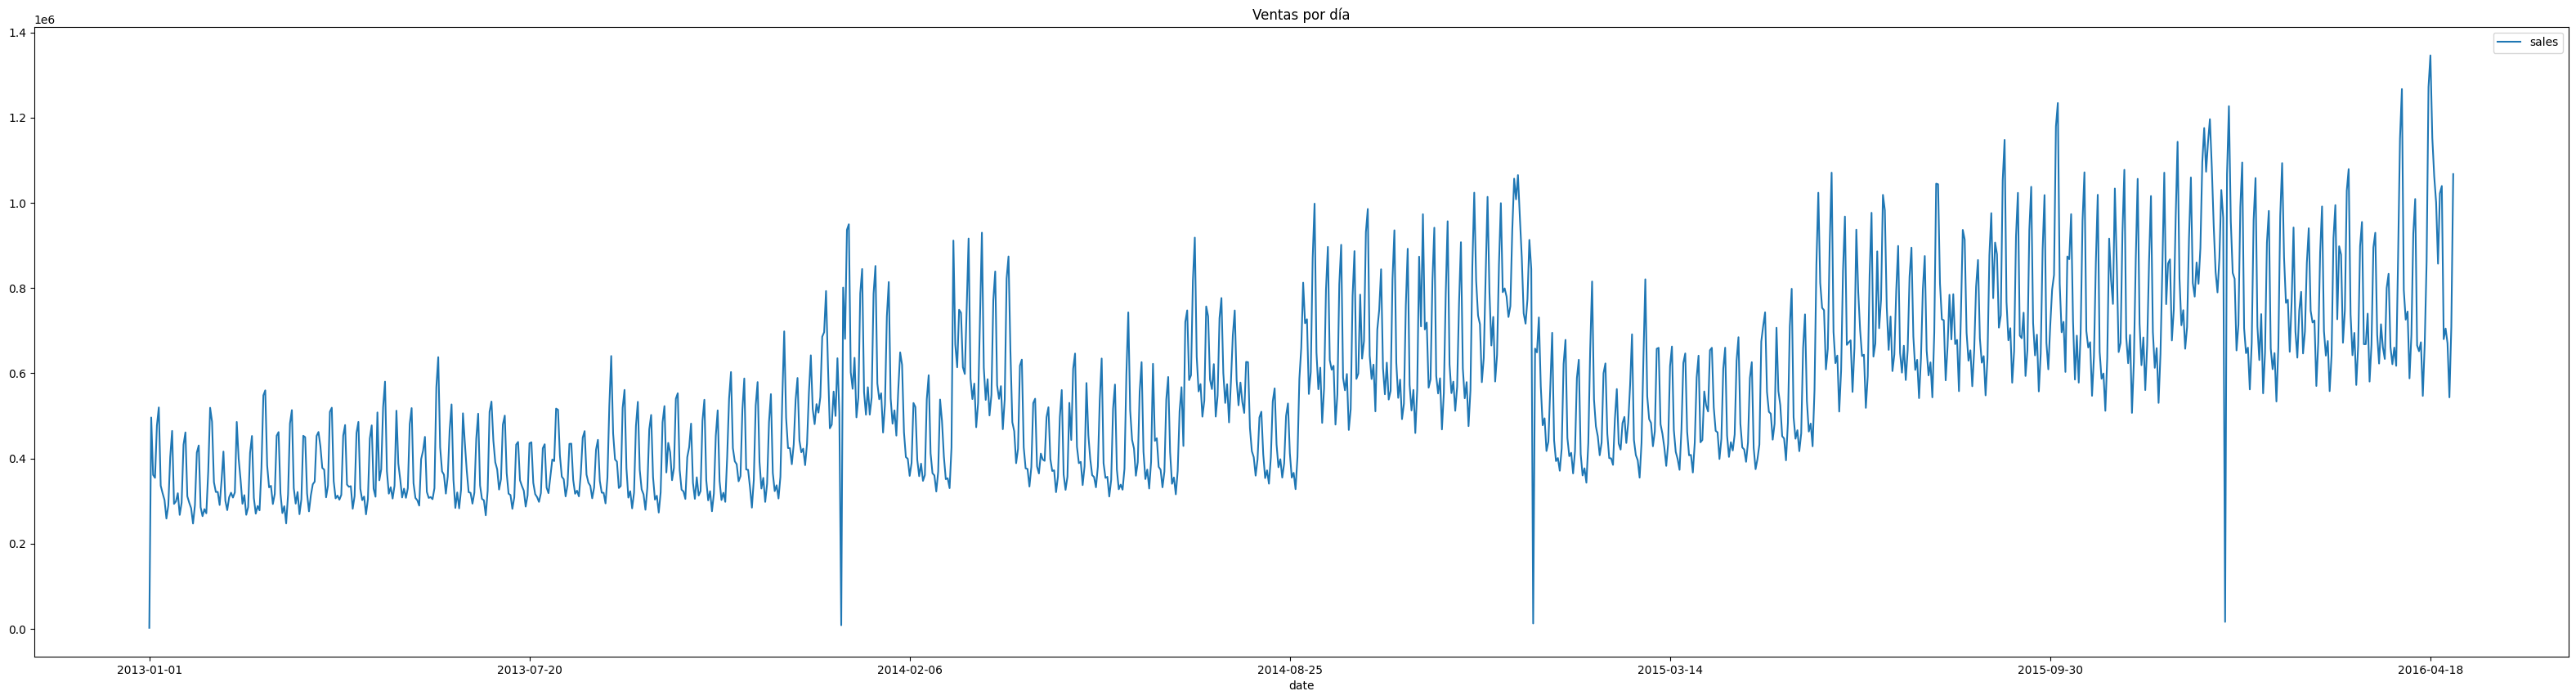

In [4]:
# Grafico de Lineas con Pandas
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html
por_dia.plot.line(
    y='sales', 
    figsize=(40,10)
)
plt.title('Ventas por día')

In [5]:
# Grafico de Lineas con Plotly
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html
fig = px.line(
    por_dia, 
    x=por_dia.index.values,
    y="sales", 
    title='Ventas por dia'
)
fig.show()

In [6]:
df2 = pd.read_csv('../data/marcas_mensajes_twitter.csv')
df2

,Unnamed: 0,idx,brand-experience,class,classification,created_at,customer-service,cx_brand,digital-experience,events,...,index,lang,message,probabilities,sentiment,tokenized,tweet_url,type,google_sentiment_score,google_sentiment_measure
0,0,0,0.000000,4,events,Thu Oct 04 15:59:56 +0000 2018,0.000000,adidasoriginals,0.000000,1.0,...,233,en,Shout out @adidasoriginals for having me down ...,NaN,-0.542300,shout shoot cut adidas sneaker con store event...,https://twitter.com/IAMDJCHUX/status/104787899...,1,0.4,1.4
1,1,1,0.000000,4,events,Thu Oct 04 01:23:46 +0000 2018,0.000000,BedBathBeyond,0.000000,1.0,...,889,en,@BedBathBeyond that time I went to you DT seat...,NaN,0.000000,time went seattle store closing event cashier ...,https://twitter.com/mahenry/status/10476585037...,1,-0.7,0.7
2,2,2,0.000000,4,events,Sat Sep 29 00:59:07 +0000 2018,0.000000,Hermes_Paris,0.000000,1.0,...,934,en,@Hermes_Paris I need to go to this event pleas...,NaN,0.585900,need event please put list thank need list,https://twitter.com/funnyithink1/status/104584...,1,0.4,0.9
3,3,3,0.000000,4,events,Thu Oct 04 18:37:17 +0000 2018,0.000000,jcpenney,0.000000,1.0,...,1096,en,Suit-Up!In partnership with @jcpenney next Sat...,NaN,0.000000,suit partnership next sat msu take students jc...,https://twitter.com/MorganStateU/status/104791...,1,0.3,0.3
4,4,4,0.000000,4,events,Fri Sep 28 12:00:58 +0000 2018,0.000000,Loreal,0.000000,1.0,...,1345,en,👉 | Ever wondered what it takes to work for a ...,NaN,0.361200,ever wondered takes work company like running ...,https://twitter.com/AstonCareers/status/104564...,1,-0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53509,53509,101825,0.038267,0,digital-experience,Mon Apr 15 19:17:33 +0000 2019,0.359278,BNBuzz,0.596595,NaN,...,97185,en,@BNBuzz Hello do you know if your site is expe...,"[0.038267060478025416, 0.35927809868248184, 0....",0.242857,hello know site experiencing issues right tryi...,https://twitter.com/McGrubbin/status/111786958...,1,-0.1,1.9
53510,53510,101827,0.087985,3,customer-service,Mon Apr 15 00:43:22 +0000 2019,0.439944,BNBuzz,0.389421,NaN,...,97187,en,Hey @BNBuzz - was disappointed today to discov...,"[0.08798487773051575, 0.4399439711795116, 0.38...",-0.325000,hey disappointed today discover someone paid m...,https://twitter.com/LegallyHEA/status/11175891...,1,-0.7,0.7
53511,53511,101832,0.059421,3,customer-service,Sat Apr 13 22:50:35 +0000 2019,0.598173,BNBuzz,0.039001,NaN,...,97192,en,Just called @BNBuzz to reserve my copy of #mil...,"[0.05942064232978142, 0.5981729262481892, 0.03...",0.000000,called reserve copy millenneagram pick store c...,https://twitter.com/maggsical/status/111719842...,1,0.8,1.6
53512,53512,101834,0.011430,0,digital-experience,Sat Apr 13 20:46:24 +0000 2019,0.385919,BNBuzz,0.435974,NaN,...,97194,en,I'll never buy an ebook from @BNBuzz again. I ...,"[0.011430311521668266, 0.3859185518124338, 0.4...",0.829000,never buy ebook gift card work order support t...,https://twitter.com/Laurenipal10/status/111716...,1,-0.7,3.0


In [7]:
df2['fecha_parseada'] = pd.to_datetime(df2['created_at'], format='%a %b %d %H:%M:%S %z %Y')
df2

,Unnamed: 0,idx,brand-experience,class,classification,created_at,customer-service,cx_brand,digital-experience,events,...,lang,message,probabilities,sentiment,tokenized,tweet_url,type,google_sentiment_score,google_sentiment_measure,fecha_parseada
0,0,0,0.000000,4,events,Thu Oct 04 15:59:56 +0000 2018,0.000000,adidasoriginals,0.000000,1.0,...,en,Shout out @adidasoriginals for having me down ...,NaN,-0.542300,shout shoot cut adidas sneaker con store event...,https://twitter.com/IAMDJCHUX/status/104787899...,1,0.4,1.4,2018-10-04 15:59:56+00:00
1,1,1,0.000000,4,events,Thu Oct 04 01:23:46 +0000 2018,0.000000,BedBathBeyond,0.000000,1.0,...,en,@BedBathBeyond that time I went to you DT seat...,NaN,0.000000,time went seattle store closing event cashier ...,https://twitter.com/mahenry/status/10476585037...,1,-0.7,0.7,2018-10-04 01:23:46+00:00
2,2,2,0.000000,4,events,Sat Sep 29 00:59:07 +0000 2018,0.000000,Hermes_Paris,0.000000,1.0,...,en,@Hermes_Paris I need to go to this event pleas...,NaN,0.585900,need event please put list thank need list,https://twitter.com/funnyithink1/status/104584...,1,0.4,0.9,2018-09-29 00:59:07+00:00
3,3,3,0.000000,4,events,Thu Oct 04 18:37:17 +0000 2018,0.000000,jcpenney,0.000000,1.0,...,en,Suit-Up!In partnership with @jcpenney next Sat...,NaN,0.000000,suit partnership next sat msu take students jc...,https://twitter.com/MorganStateU/status/104791...,1,0.3,0.3,2018-10-04 18:37:17+00:00
4,4,4,0.000000,4,events,Fri Sep 28 12:00:58 +0000 2018,0.000000,Loreal,0.000000,1.0,...,en,👉 | Ever wondered what it takes to work for a ...,NaN,0.361200,ever wondered takes work company like running ...,https://twitter.com/AstonCareers/status/104564...,1,-0.1,0.1,2018-09-28 12:00:58+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53509,53509,101825,0.038267,0,digital-experience,Mon Apr 15 19:17:33 +0000 2019,0.359278,BNBuzz,0.596595,NaN,...,en,@BNBuzz Hello do you know if your site is expe...,"[0.038267060478025416, 0.35927809868248184, 0....",0.242857,hello know site experiencing issues right tryi...,https://twitter.com/McGrubbin/status/111786958...,1,-0.1,1.9,2019-04-15 19:17:33+00:00
53510,53510,101827,0.087985,3,customer-service,Mon Apr 15 00:43:22 +0000 2019,0.439944,BNBuzz,0.389421,NaN,...,en,Hey @BNBuzz - was disappointed today to discov...,"[0.08798487773051575, 0.4399439711795116, 0.38...",-0.325000,hey disappointed today discover someone paid m...,https://twitter.com/LegallyHEA/status/11175891...,1,-0.7,0.7,2019-04-15 00:43:22+00:00
53511,53511,101832,0.059421,3,customer-service,Sat Apr 13 22:50:35 +0000 2019,0.598173,BNBuzz,0.039001,NaN,...,en,Just called @BNBuzz to reserve my copy of #mil...,"[0.05942064232978142, 0.5981729262481892, 0.03...",0.000000,called reserve copy millenneagram pick store c...,https://twitter.com/maggsical/status/111719842...,1,0.8,1.6,2019-04-13 22:50:35+00:00
53512,53512,101834,0.011430,0,digital-experience,Sat Apr 13 20:46:24 +0000 2019,0.385919,BNBuzz,0.435974,NaN,...,en,I'll never buy an ebook from @BNBuzz again. I ...,"[0.011430311521668266, 0.3859185518124338, 0.4...",0.829000,never buy ebook gift card work order support t...,https://twitter.com/Laurenipal10/status/111716...,1,-0.7,3.0,2019-04-13 20:46:24+00:00


In [8]:
df2 = df2.sort_values('fecha_parseada')
df2['periodo'] = df2['fecha_parseada'].apply(lambda x: x.strftime('%Y-%m-%d'))
df2

,Unnamed: 0,idx,brand-experience,class,classification,created_at,customer-service,cx_brand,digital-experience,events,...,message,probabilities,sentiment,tokenized,tweet_url,type,google_sentiment_score,google_sentiment_measure,fecha_parseada,periodo
3711,3711,4642,0.010168,0,customer-service,Mon Sep 24 15:01:46 +0000 2018,0.903283,IKEAIESupport,0.038699,NaN,...,@IKEAUSAHelp @IKEAUSA @IKEAIESupport THIS IS N...,"[0.010167884835340988, 0.903282671925076, 0.03...",-0.250000,okay office placed order july supposed,https://twitter.com/KristyMarieByrd/status/104...,1,-0.4,1.4,2018-09-24 15:01:46+00:00,2018-09-24
100,100,103,0.000000,4,events,Mon Sep 24 15:31:16 +0000 2018,0.000000,neimanmarcus,0.000000,1.0,...,The recent Beauty Buzz event at @neimanmarcus ...,NaN,0.888500,recent beauty buzz event benefit smashing succ...,https://twitter.com/GazelleMag_USA/status/1044...,1,0.9,0.9,2018-09-24 15:31:16+00:00,2018-09-24
4448,4448,5676,0.377655,0,customer-service,Mon Sep 24 18:35:01 +0000 2018,0.550285,NikeSupport,0.029061,NaN,...,@NikeSupport All done i've runed with the huwa...,"[0.37765464067811627, 0.5502846887238086, 0.02...",0.125000,done runed huwaei worked normally also runed o...,https://twitter.com/KhefachaMohamed/status/104...,1,0.5,1.0,2018-09-24 18:35:01+00:00,2018-09-24
4139,4139,5251,0.019139,3,customer-service,Mon Sep 24 19:40:52 +0000 2018,0.601301,Bloomingdales,0.203290,NaN,...,Ordered the wrong size shoes from @Bloomingdal...,"[0.0191391093838689, 0.6013005315787773, 0.203...",-0.500000,ordered wrong size shoes didnt realize went pi...,https://twitter.com/RileyWryly/status/10443107...,1,-0.2,0.4,2018-09-24 19:40:52+00:00,2018-09-24
5697,5697,7366,0.009618,0,customer-service,Mon Sep 24 22:01:51 +0000 2018,0.901832,IKEAUKSupport,0.046501,NaN,...,@IKEAUKSupport hi my order has not delivered f...,"[0.009617512825884229, 0.9018317642382799, 0.0...",0.000000,order delivered second time called confirm mor...,https://twitter.com/KSiddall/status/1044346199...,1,-0.3,1.9,2018-09-24 22:01:51+00:00,2018-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52122,52122,99679,0.388180,1,customer-service,Sun Apr 21 20:21:19 +0000 2019,0.477981,Apple,0.012666,NaN,...,ok apple send me 64GB instead of 128 because t...,"[0.38817999396828234, 0.47798058838597585, 0.0...",0.510600,apple send instead theres waiting surprise imm...,https://twitter.com/angelichandle/status/11200...,1,-0.5,0.5,2019-04-21 20:21:19+00:00,2019-04-21
50820,50820,97692,0.008958,1,in-store,Sun Apr 21 20:25:18 +0000 2019,0.406679,Starbucks,0.080667,NaN,...,@Starbucks Customer Service really needs a rev...,"[0.00895829726198172, 0.4066791900686813, 0.08...",-0.230000,customer service really needs revamp pretty pa...,https://twitter.com/rritcheypac/status/1120060...,1,-0.8,1.6,2019-04-21 20:25:18+00:00,2019-04-21
52833,52833,100802,0.037526,0,customer-service,Sun Apr 21 20:36:28 +0000 2019,0.875426,AskTarget,0.062159,NaN,...,@AskTarget I placed a restock order and I thin...,"[0.037526216348068256, 0.8754257865309862, 0.0...",0.500000,placed restock order think stuck limbo somewhe...,https://twitter.com/ShannonLeyerle/status/1120...,1,-0.7,1.5,2019-04-21 20:36:28+00:00,2019-04-21
52635,52635,100499,0.577883,3,brand-experience,Sun Apr 21 20:38:32 +0000 2019,0.058775,Gap,0.033336,NaN,...,My perfect run of no cracks in my iPhone scree...,"[0.5778831653079574, 0.05877457159482334, 0.03...",0.392593,perfect run cracks iphone screen come end year...,https://twitter.com/christophzo/status/1120064...,1,0.5,0.5,2019-04-21 20:38:32+00:00,2019-04-21


In [9]:
df2_agrupado = df2[['periodo', 'idx']].groupby('periodo').count()
df2_agrupado = df2_agrupado.reset_index()
df2_agrupado

,periodo,idx
0,2018-09-24,8
1,2018-09-25,358
2,2018-09-26,321
3,2018-09-27,285
4,2018-09-28,320
...,...,...
142,2019-04-17,377
143,2019-04-18,331
144,2019-04-19,294
145,2019-04-20,305


In [10]:
# Grafico de Lineas con Plotly
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html
fig = px.line(
    df2_agrupado, 
    x="periodo",
    y="idx", 
    title='Mensajes por dia'
)
fig.show()